In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Nhập các thư viện cần thiết
import matplotlib.pyplot as plt  # Matplotlib để vẽ đồ thị cơ bản
import seaborn as sns  # Seaborn để trực quan hóa dữ liệu thống kê
import pandas as pd  # Pandas để thực hiện các thao tác xử lý và phân tích dữ liệu
import plotly.express as px  # Plotly Express để tạo đồ thị tương tác
from bokeh.plotting import figure, show  # Bokeh để vẽ đồ thị tương tác
import altair as alt  # Altair để trực quan hóa thống kê theo cách khai báo

In [4]:
flights = pd.read_csv('/content/gdrive/MyDrive/Clean_Dataset.csv')

In [5]:
flights = flights.drop(columns='Unnamed: 0', axis=1)

In [6]:
flights

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


### Phân phối của thời lượng chuyến bay, số ngày còn lại và giá vé

In [7]:
flights.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


### Vẽ biểu đồ phân phối giá vé

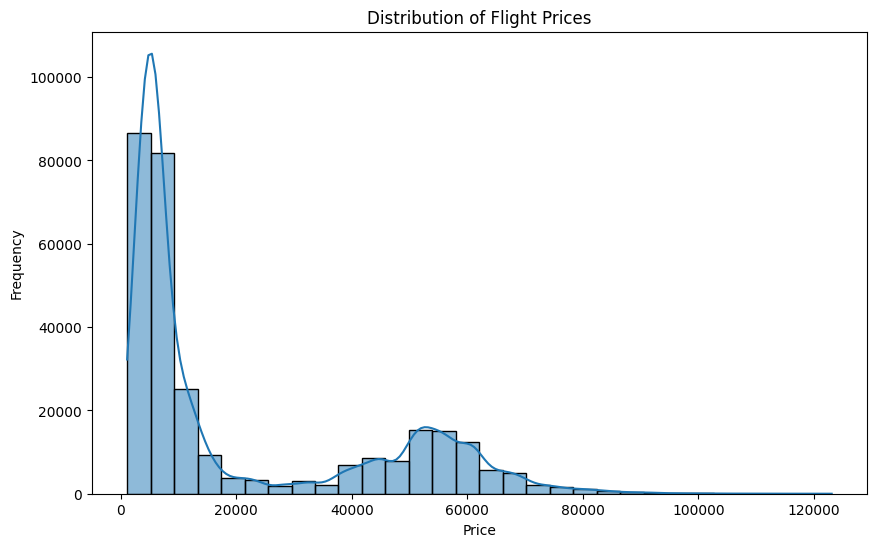

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data=flights, x='price', bins=30, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

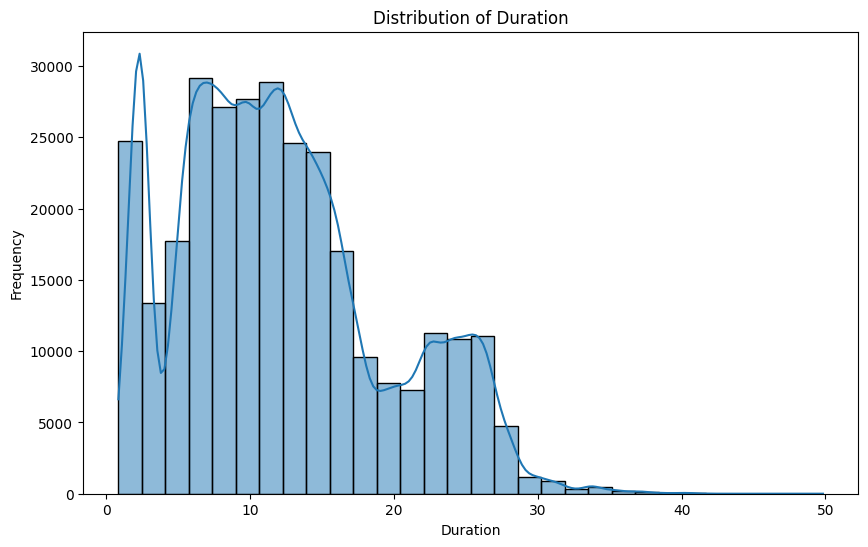

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data=flights, x='duration', bins=30, kde=True)
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

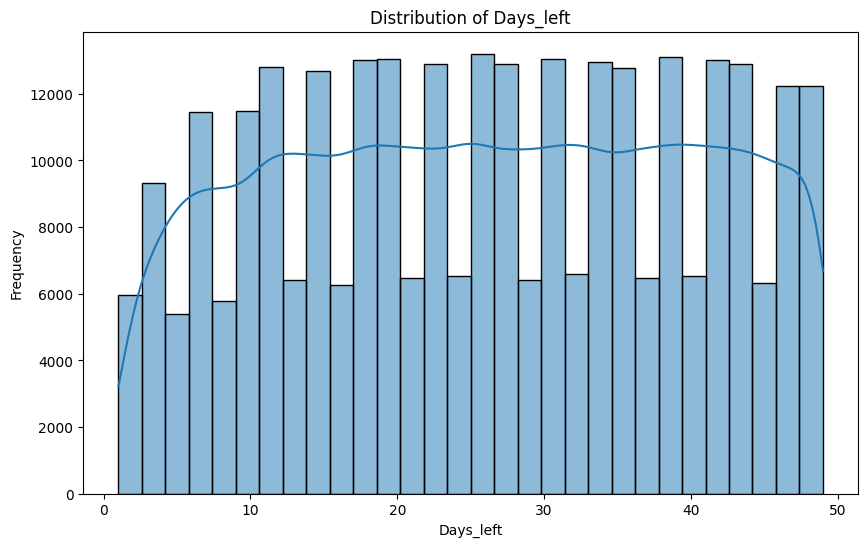

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=flights, x='days_left', bins=30, kde=True)
plt.title('Distribution of Days_left')
plt.xlabel('Days_left')
plt.ylabel('Frequency')
plt.show()

### Phân loại các biến

Text(0.5, 1.0, 'Distribution of Airlines')

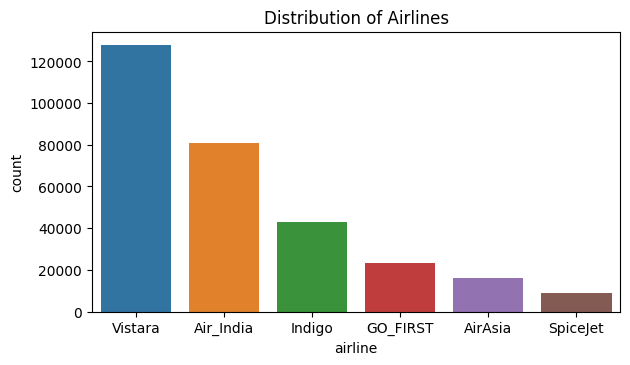

In [11]:
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
order = flights['airline'].value_counts().index
sns.countplot(data=flights, x='airline', order=order)
plt.title('Distribution of Airlines')

Text(0.5, 1.0, 'Distribution of Source Cities')

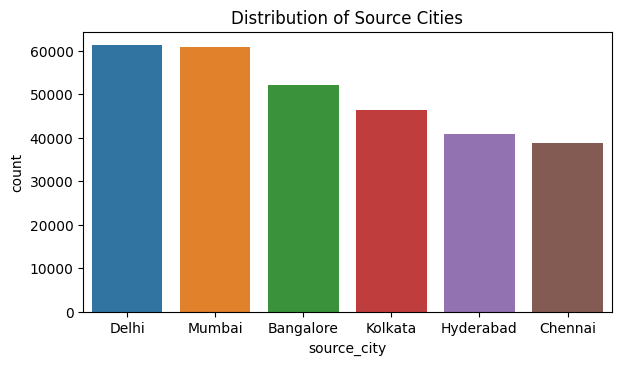

In [12]:
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 2)
order = flights['source_city'].value_counts().index

sns.countplot(data=flights, x='source_city', order=order)
plt.title('Distribution of Source Cities')

Text(0.5, 1.0, 'Distribution of Stops')

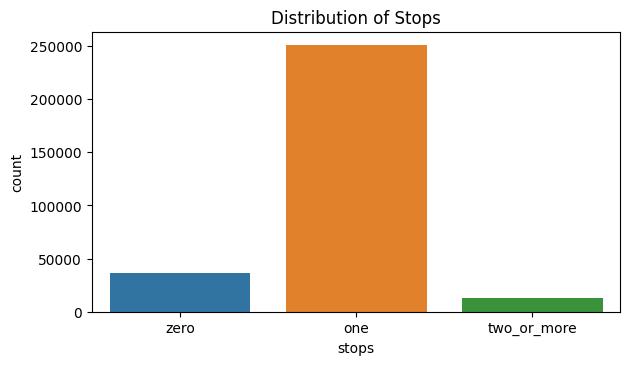

In [13]:
plt.figure(figsize=(15, 8))


plt.subplot(2, 2, 3)
sns.countplot(data=flights, x='stops')
plt.title('Distribution of Stops')

Text(0.5, 1.0, 'Distribution of Classes')

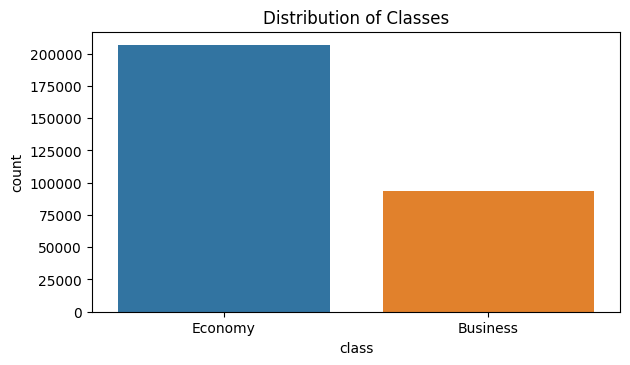

In [14]:
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 4)
sns.countplot(data=flights, x='class')
plt.title('Distribution of Classes')


<ipython-input-15-7640b59401ca>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = flights.corr()


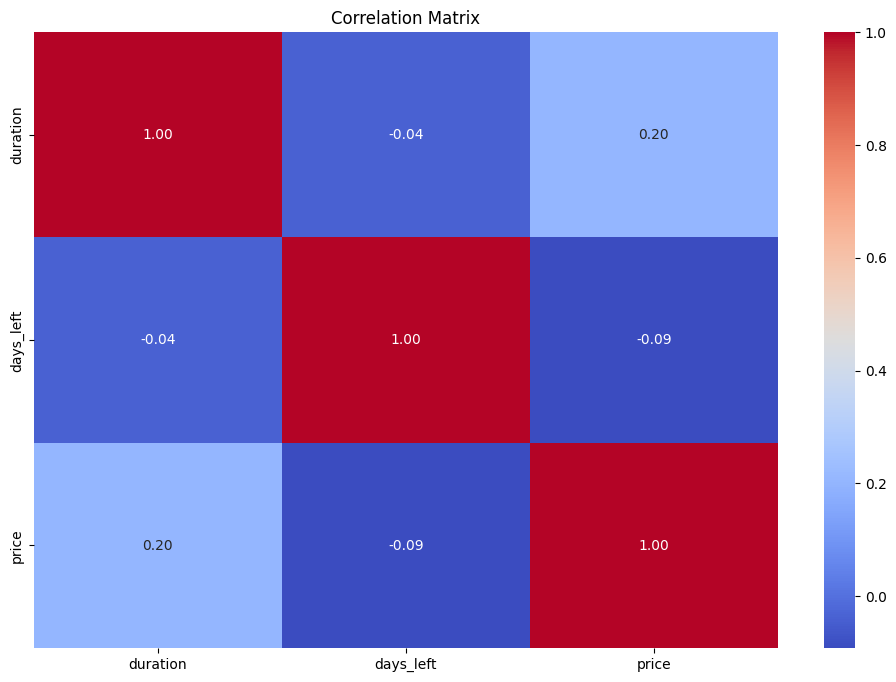

In [15]:
correlation_matrix = flights.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


### Phân tích sự ảnh hưởng đến giá vé

- Ảnh hưởng của thời gian đặt vé

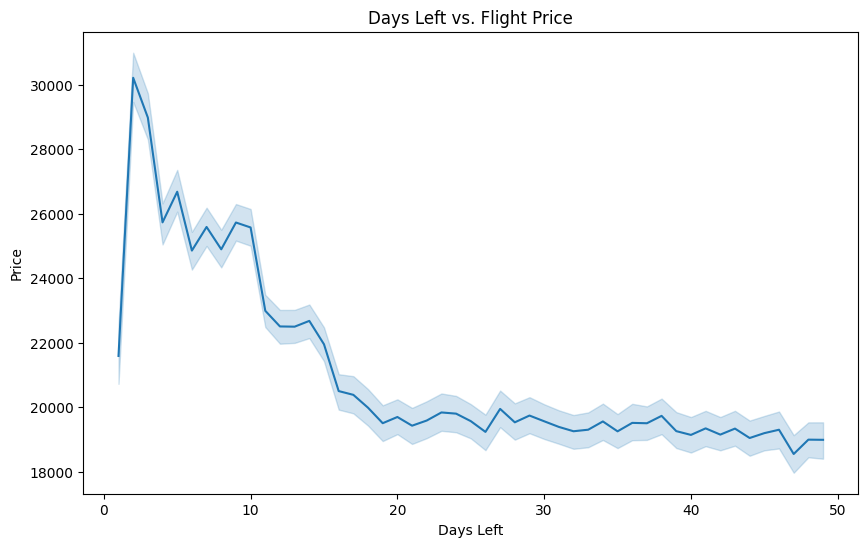

In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=flights, x='days_left', y='price')
plt.title('Days Left vs. Flight Price')
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.show()

- Ảnh hưởng của thời gian của chuyến bay

<ipython-input-17-1e7a7a8b4efa>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=flights, x='departure_time', y='price', ci=None, palette='Blues')
<ipython-input-17-1e7a7a8b4efa>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=flights, x='arrival_time', y='price', ci=None, palette='Oranges')


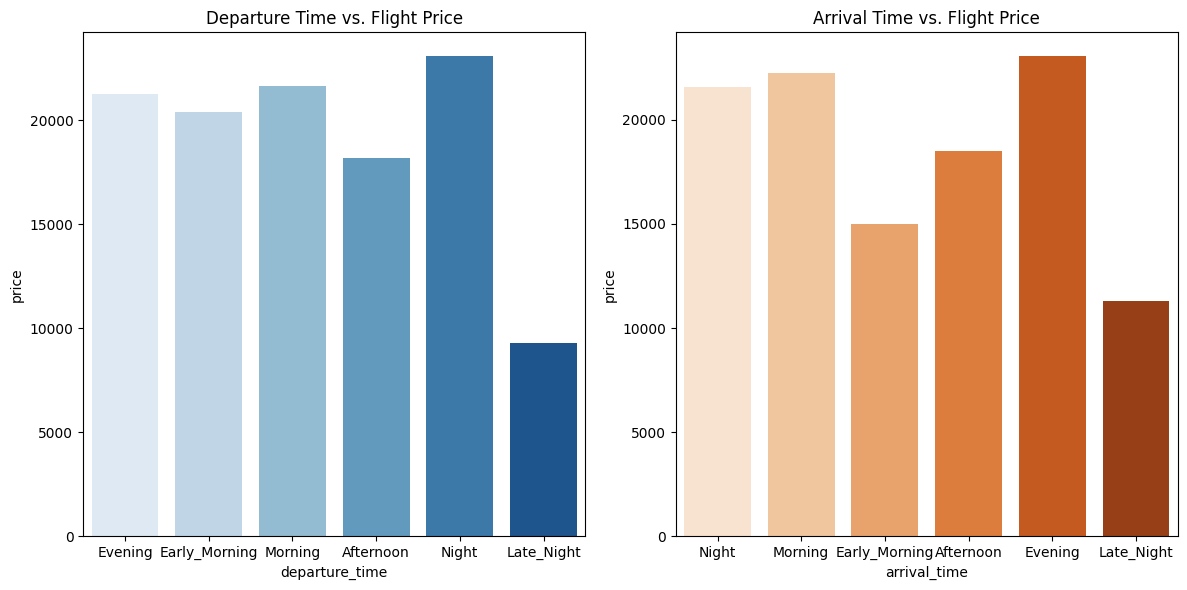

In [17]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=flights, x='departure_time', y='price', ci=None, palette='Blues')
plt.title('Departure Time vs. Flight Price')
# plt.ylim(0, flights['price'].max())  # Đặt giới hạn trục Y

plt.subplot(1, 2, 2)
sns.barplot(data=flights, x='arrival_time', y='price', ci=None, palette='Oranges')
plt.title('Arrival Time vs. Flight Price')
# plt.ylim(0, flights['price'].max())  # Đặt giới hạn trục Y

plt.tight_layout()
plt.show()




<ipython-input-21-470ead3de0eb>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=flights, x='airline', y='price', ci=None, palette='Blues')


Text(0.5, 1.0, 'Airlines vs. Flight Price')

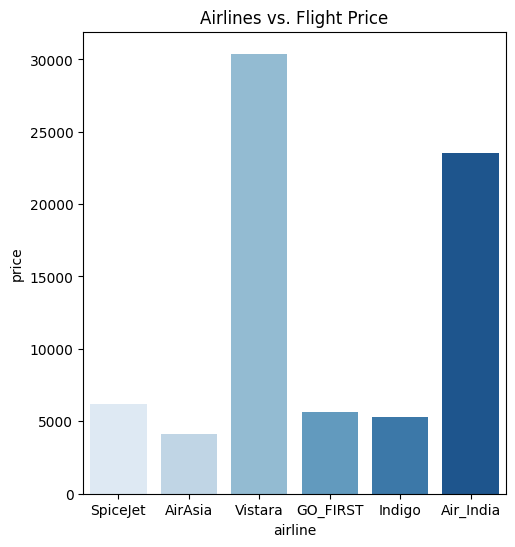

In [21]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=flights, x='airline', y='price', ci=None, palette='Blues')
plt.title('Airlines vs. Flight Price')

- ảnh hưởng của thời gian bay

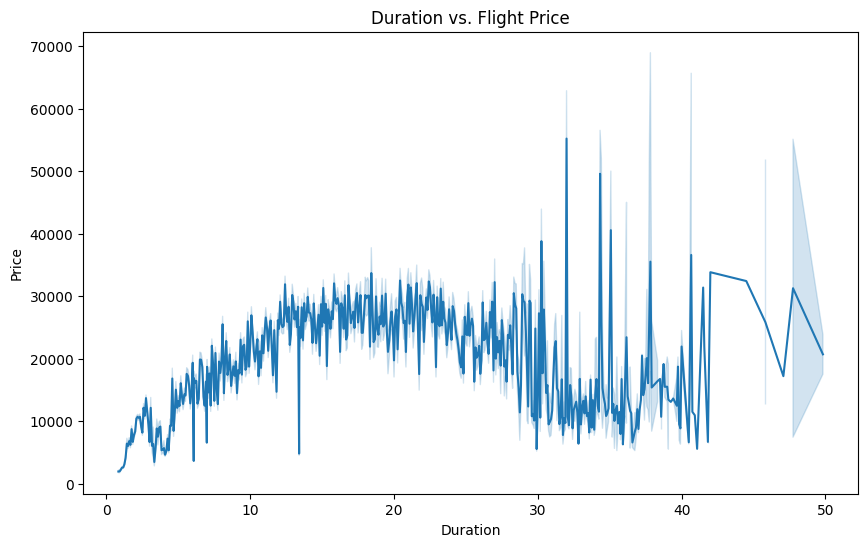

In [18]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=flights, x='duration', y='price')
plt.title('Duration vs. Flight Price')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()


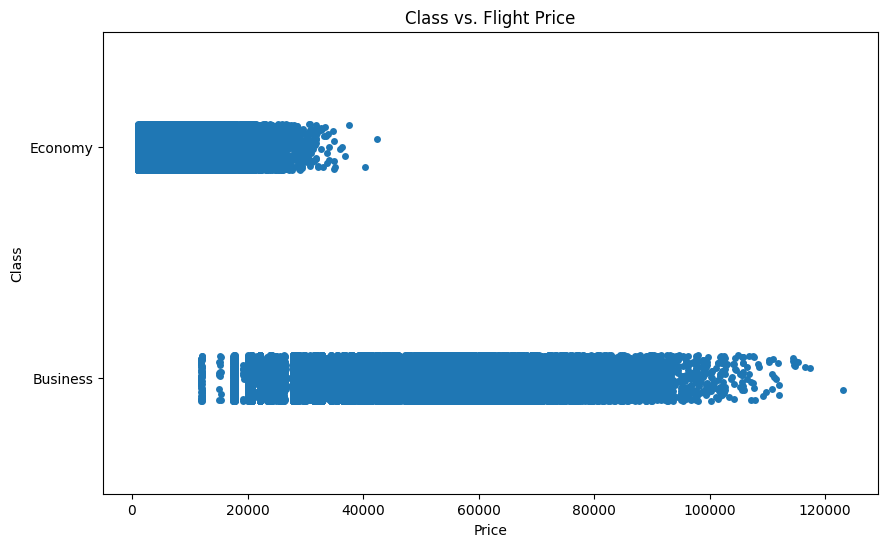

In [19]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='price',y='class',data=flights)
plt.title('Class vs. Flight Price')
plt.ylabel('Class')
plt.xlabel('Price')
plt.show()
